In [214]:
#!pip3 install scipy
#!pip3 install wordcloud
#!pip3 install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
# from wordcloud import WordCloud
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [215]:
data_path = "dataset/Hostel.csv"
df = pd.read_csv(data_path)

In [216]:
df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     342 non-null    int64  
 1   hostel.name    342 non-null    object 
 2   City           342 non-null    object 
 3   price.from     342 non-null    int64  
 4   Distance       342 non-null    object 
 5   summary.score  327 non-null    float64
 6   rating.band    327 non-null    object 
 7   atmosphere     327 non-null    float64
 8   cleanliness    327 non-null    float64
 9   facilities     327 non-null    float64
 10  location.y     327 non-null    float64
 11  security       327 non-null    float64
 12  staff          327 non-null    float64
 13  valueformoney  327 non-null    float64
 14  lon            298 non-null    float64
 15  lat            298 non-null    float64
dtypes: float64(10), int64(2), object(4)
memory usage: 42.9+ KB


In [218]:
df.describe()

,Unnamed: 0,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
count,342.000000,3.420000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,171.500000,8.388012e+03,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.756376,34.976583
std,98.871128,7.641527e+04,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251995,2.040896
min,1.000000,1.000000e+03,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,86.250000,2.000000e+03,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505314,34.668900
50%,171.500000,2.500000e+03,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761617,34.998470
75%,256.750000,2.900000e+03,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,342.000000,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


In [219]:
df.isna().sum()

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64

# Data Cleansing

In [220]:
df = df.dropna(subset = ["summary.score"])

In [221]:
df.isna().sum()

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score     0
rating.band       0
atmosphere        0
cleanliness       0
facilities        0
location.y        0
security          0
staff             0
valueformoney     0
lon              29
lat              29
dtype: int64

In [222]:
df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [223]:
df['Distance'] = df['Distance'].apply(lambda x : float(x[:len(x) - 19]))
df = df.rename(columns = {'Distance' : 'distance from city centre(in km)'})
df.head()

,Unnamed: 0,hostel.name,City,price.from,distance from city centre(in km),summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 341
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        327 non-null    int64  
 1   hostel.name                       327 non-null    object 
 2   City                              327 non-null    object 
 3   price.from                        327 non-null    int64  
 4   distance from city centre(in km)  327 non-null    float64
 5   summary.score                     327 non-null    float64
 6   rating.band                       327 non-null    object 
 7   atmosphere                        327 non-null    float64
 8   cleanliness                       327 non-null    float64
 9   facilities                        327 non-null    float64
 10  location.y                        327 non-null    float64
 11  security                          327 non-null    float64
 12  staff        

In [225]:
df = df.drop(columns = ['Unnamed: 0'])
df = df.rename(columns = {'hostel.name' : 'name','price.from' : 'price per night(in yen)', 'summary.score' : 'overall score', \
                     'rating.band' : 'rating band', 'location.y' : 'location', 'City' : 'city'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 341
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              327 non-null    object 
 1   city                              327 non-null    object 
 2   price per night(in yen)           327 non-null    int64  
 3   distance from city centre(in km)  327 non-null    float64
 4   overall score                     327 non-null    float64
 5   rating band                       327 non-null    object 
 6   atmosphere                        327 non-null    float64
 7   cleanliness                       327 non-null    float64
 8   facilities                        327 non-null    float64
 9   location                          327 non-null    float64
 10  security                          327 non-null    float64
 11  staff                             327 non-null    float64
 12  valueformoney

Found some wrong position

In [226]:
df['name'].duplicated().any()

False

In [227]:
#df['city'] = df['name'].apply(lambda x : 'Takayama' if x == 'Sakura Guest House' else x)
#df['lat'] = df['name'].apply(lambda x : 34.75 if x == 'Hostel J Culture 168' else x)
df.loc[df['name'].str.contains('Sakura Guest House', case=False), 'city'] = 'Takayama'
df.loc[df['name'].str.contains('Hostel J Culture 168', case=False), 'lat'] = 34.75
df.loc[df['name'].str.contains('Hostel J Culture 168', case=False), 'lon'] = 135.48
#df['lon'] = df['name'].apply(lambda x : 135.48 if x == 'Hostel J Culture 168' else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 0 to 341
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              327 non-null    object 
 1   city                              327 non-null    object 
 2   price per night(in yen)           327 non-null    int64  
 3   distance from city centre(in km)  327 non-null    float64
 4   overall score                     327 non-null    float64
 5   rating band                       327 non-null    object 
 6   atmosphere                        327 non-null    float64
 7   cleanliness                       327 non-null    float64
 8   facilities                        327 non-null    float64
 9   location                          327 non-null    float64
 10  security                          327 non-null    float64
 11  staff                             327 non-null    float64
 12  valueformoney

In [228]:
df.describe()

,price per night(in yen),distance from city centre(in km),overall score,atmosphere,cleanliness,facilities,location,security,staff,valueformoney,lon,lat
count,3.270000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,8.612538e+03,5.770642,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.747070,34.971701
std,7.814571e+04,4.609639,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251666,2.039688
min,1.000000e+03,0.000000,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,2.000000e+03,2.350000,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505276,34.668900
50%,2.500000e+03,4.500000,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761543,34.998099
75%,2.900000e+03,8.500000,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696562
max,1.003200e+06,36.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.135716


In [229]:
print([x for x in df['price per night(in yen)'] if x > 100000])
df['price per night(in yen)'] = df['price per night(in yen)'].apply(lambda x : 3200 if x == 1003200 else x)
df.describe()

[1003200, 1003200]


,price per night(in yen),distance from city centre(in km),overall score,atmosphere,cleanliness,facilities,location,security,staff,valueformoney,lon,lat
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,2496.330275,5.770642,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.747070,34.971701
std,819.313637,4.609639,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251666,2.039688
min,1000.000000,0.000000,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,2000.000000,2.350000,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505276,34.668900
50%,2500.000000,4.500000,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761543,34.998099
75%,2900.000000,8.500000,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696562
max,7600.000000,36.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.135716


<Axes: title={'center': 'Distribution of Distance from City Centre (in km)'}, xlabel='distance from city centre(in km)'>

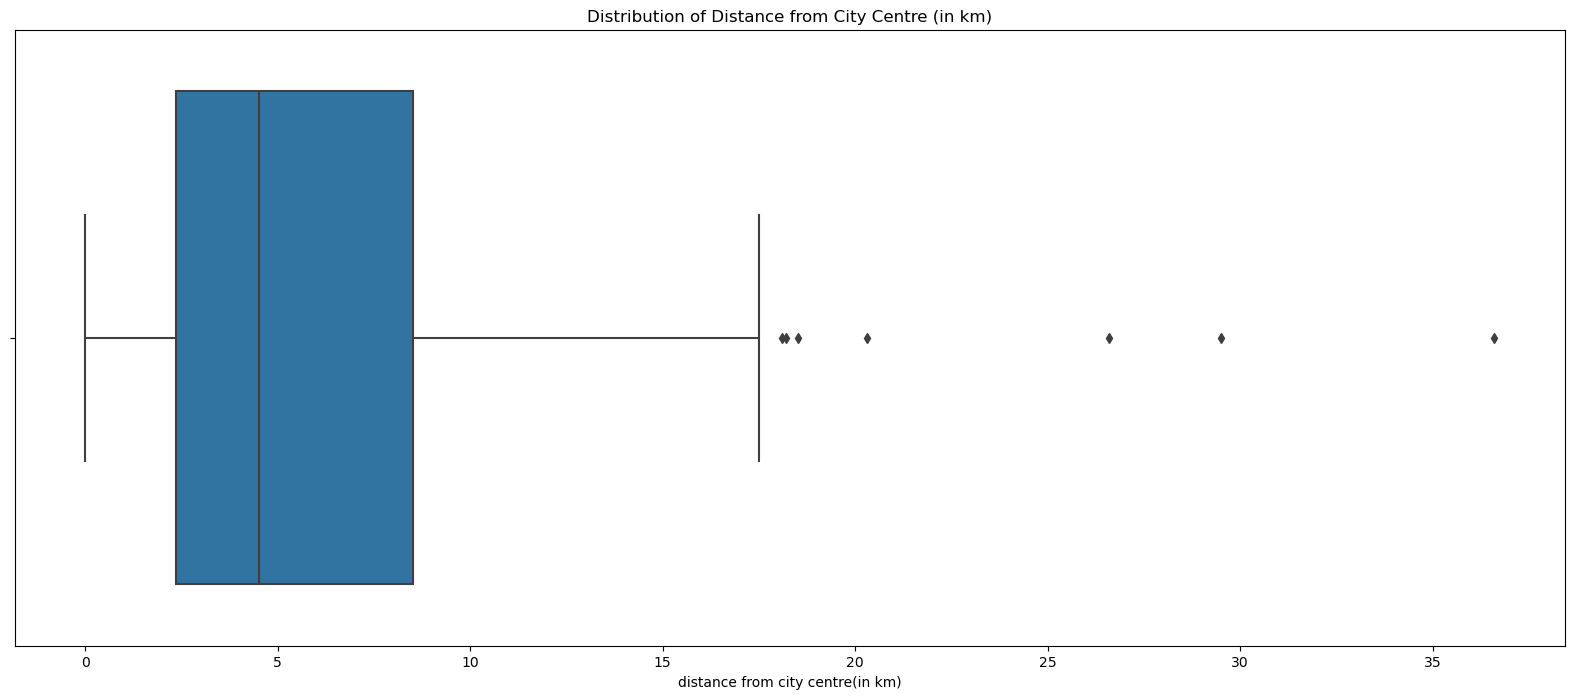

In [230]:
plt.figure(figsize=(20,8))
plt.title("Distribution of Distance from City Centre (in km)")
sns.boxplot(x = "distance from city centre(in km)", data = df)

In [233]:
distance_stats = df["distance from city centre(in km)"].describe()
distance_q1 = distance_stats['25%']
distance_q3 = distance_stats['75%']
distance_iqr = distance_q3 - distance_q1
distance_min = distance_q1 - 1.5 * distance_iqr
distance_max = distance_q3 + 1.5 * distance_iqr

print(f"Minimum value (excluding outliers): {distance_min:.2f}")
print(f"Maximum value (excluding outliers): {distance_max:.2f}")

Minimum value (excluding outliers): -6.88
Maximum value (excluding outliers): 17.73


In [234]:
price_stats = df["price per night(in yen)"].describe()
price_q1 = price_stats['25%']
price_q3 = price_stats['75%']
price_iqr = price_q3 - price_q1
price_min = price_q1 - 1.5 * price_iqr
price_max = price_q3 + 1.5 * price_iqr

print(f"Minimum value (excluding outliers): {price_min:.2f}")
print(f"Maximum value (excluding outliers): {price_max:.2f}")

Minimum value (excluding outliers): 650.00
Maximum value (excluding outliers): 4250.00


In [231]:
out_path = "dataset/Hostel(Adjusted).csv"
df.to_csv(out_path)